In [307]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [297]:
ted = pd.read_csv('data/ted_expanded.csv').drop(list(ted.loc[ted['transcript'].isna() == True].index))

In [298]:
ted.loc[:, 'laugh_count'] = ted['transcript'].str.count("(Laughter)")
ted.loc[:, 'applause_count'] = ted['transcript'].str.count("(Applause)")
ted.loc[:, 'hours_since_publish'] = ((pd.to_datetime(['2017-09-25']).astype(int) / 10**9) - ted['published_date']) / (60*60)
ted.loc[:, 'super_popular'] = 0
ted.loc[ted['views'] > 4000000, 'super_popular'] = 1
ted['transcript'] = (ted['transcript'].str.replace("\\'", "")
                     .str.replace("\(Laughter\)", " ")
                     .str.replace("\(Applause\)", " ")
                     .str.lower()
                     .str.translate(str.maketrans('()—', ' '*len('()—')))
                     .str.translate(str.maketrans('', '', string.punctuation))
                     .str.translate(str.maketrans('', '', string.digits)))

In [309]:
transcripts = (ted['transcript'].apply(word_tokenize)
                                .apply(
                                    lambda x: [item for item in x if item not in stopwords.words('english')]
                                ))

KeyboardInterrupt: 

In [310]:
transcripts

0       [good, morning, how, are, you, its, been, grea...
1       [thank, you, so, much, chris, and, its, truly,...
2       [music, the, sound, of, silence, simon, garfun...
3       [if, youre, here, today, and, im, very, happy,...
4       [about, years, ago, i, took, on, the, task, to...
                              ...                        
2548    [so, ma, was, trying, to, explain, something, ...
2549    [this, is, a, picture, of, a, sunset, on, mars...
2550    [in, my, early, days, as, a, graduate, student...
2551    [i, took, a, cell, phone, and, accidentally, m...
2552    [we, humans, are, becoming, an, urban, species...
Name: transcript, Length: 2467, dtype: object

In [299]:
sifted = ['description', 'duration', 'event', 'main_speaker', 'name', 'speaker_occupation', 
          'title', 'transcript', 'laugh_count', 'applause_count', 'hours_since_publish', 'super_popular']
ted = ted[sifted]

In [300]:
train = ted.loc[ted['hours_since_publish'] > 10000]
test = ted.loc[ted['hours_since_publish'] <= 10000]

In [301]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train.drop(['super_popular'], axis = 1), train[['super_popular']], 
    test_size = 0.2, random_state = 42)

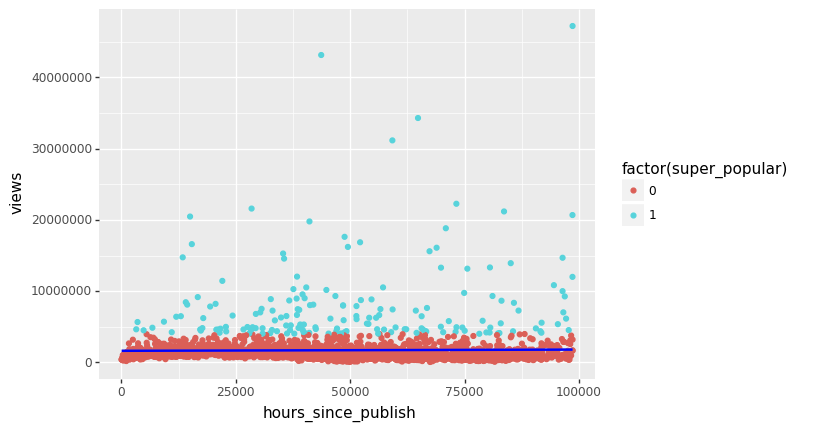

<ggplot: (7577100521)>

In [138]:
(ggplot(ted, aes(x = 'hours_since_publish', y = 'views', color = 'factor(super_popular)')) +
    geom_point() + geom_smooth(color = 'blue'))